In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns 

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.application import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [5]:
img_size = 48

In [6]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, rescale = 1./255, validation_split = 0.2)
validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [7]:
train_dir = r"C:\Users\amrit\Emotion Detector\emotion\train"
test_dir = r"C:\Users\amrit\Emotion Detector\emotion\test"

train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(img_size, img_size), batch_size=64, color_mode="grayscale", class_mode="categorical", subset="training")
validation_generator = validation_datagen.flow_from_directory(directory=test_dir, target_size=(img_size, img_size), batch_size=64, color_mode="grayscale", class_mode="categorical", subset="validation")


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [9]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile( optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
epochs = 5
batch_size = 64

In [14]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 579s 2s/step - accuracy: 0.3538 - loss: 4.7366 - val_accuracy: 0.4239 - val_loss: 4.1068
Epoch 2/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.4050 - loss: 3.5784 - val_accuracy: 0.4553 - val_loss: 3.1731
Epoch 4/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 462s 1s/step - accuracy: 0.4256 - loss: 3.1573 - val_accuracy: 0.4777 - val_loss: 2.8445
Epoch 5/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 483s 1s/step - accuracy: 0.4462 - loss: 2.8119 - val_accuracy: 0.5307 - val_loss: 2.4360


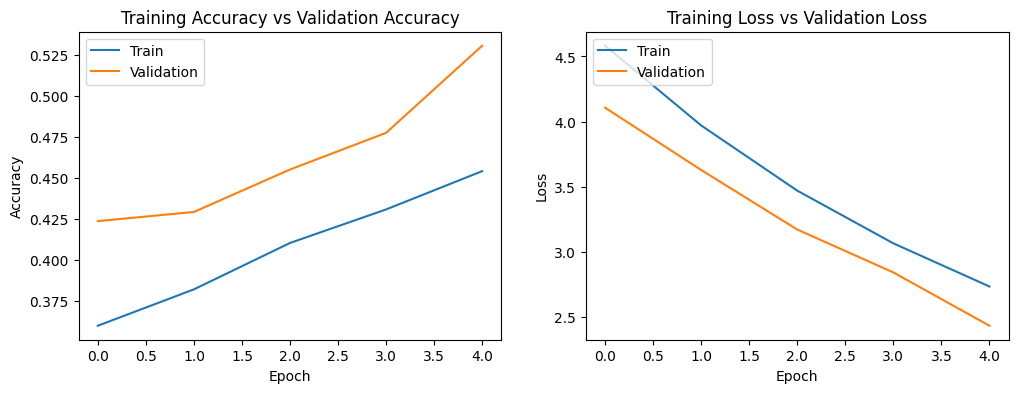

In [15]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [16]:
model.save('model_optimal.h5')

(48, 48)


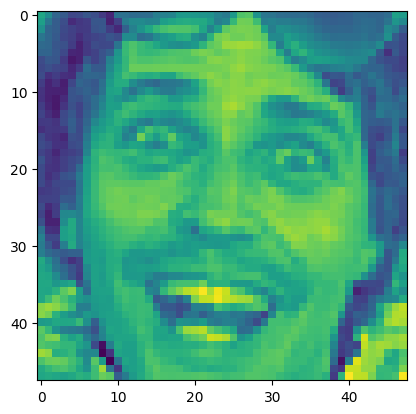

In [18]:
img = image.load_img("./emotion/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [19]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [20]:
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
[0.0, 0.0, 0.0, 1.8932939e-13, 0.0, 0.0, 1.0]


In [21]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Surprise


In [22]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)

359/359 ━━━━━━━━━━━━━━━━━━━━ 118s 327ms/step - accuracy: 0.5144 - loss: 2.4678
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.5236 - loss: 2.4722


In [24]:
model.save_weights('model_weights.weights.h5')